In [2]:
import os
import shutil
import random
import keras
import tensorflow

classes_number = 4

In [3]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Activation, Dense 
from tensorflow.keras import Model
from keras import backend as K
import tensorflow as tf
from tensorflow.keras.utils import get_custom_objects

# Photo directory paths
train_path = 'data/Farm_Dataset/train'
valid_path = 'data/Farm_Dataset/valid'
test_path = 'data/Farm_Dataset/test'

# MobileNet expect 224 by 224 images.
# Process train, valid, and test batches.
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=train_path, target_size=(224,224), batch_size=10)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=valid_path, target_size=(224,224), batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=test_path, target_size=(224,224), batch_size=10, shuffle=False)

Found 1000 images belonging to 4 classes.
Found 800 images belonging to 4 classes.
Found 600 images belonging to 4 classes.


In [26]:
mobile = keras.applications.MobileNetV3Large()

In [27]:
mobile.summary()

Model: "MobilenetV3large"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_9 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 rescaling_3 (Rescaling)        (None, None, None,   0           ['input_9[0][0]']                
                                3)                                                                
                                                                                                  
 Conv (Conv2D)                  (None, None, None,   432         ['rescaling_3[0][0]']            
                                16)                                                

 thwiseConv2D)                  72)                                                               
                                                                                                  
 expanded_conv_2/depthwise/Batc  (None, None, None,   288        ['expanded_conv_2/depthwise[0][0]
 hNorm (BatchNormalization)     72)                              ']                               
                                                                                                  
 re_lu_125 (ReLU)               (None, None, None,   0           ['expanded_conv_2/depthwise/Batch
                                72)                              Norm[0][0]']                     
                                                                                                  
 expanded_conv_2/project (Conv2  (None, None, None,   1728       ['re_lu_125[0][0]']              
 D)                             24)                                                               
          

 hNorm (BatchNormalization)     120)                             ']                               
                                                                                                  
 re_lu_130 (ReLU)               (None, None, None,   0           ['expanded_conv_4/depthwise/Batch
                                120)                             Norm[0][0]']                     
                                                                                                  
 expanded_conv_4/squeeze_excite  (None, 1, 1, 120)   0           ['re_lu_130[0][0]']              
 /AvgPool (GlobalAveragePooling                                                                   
 2D)                                                                                              
                                                                                                  
 expanded_conv_4/squeeze_excite  (None, 1, 1, 32)    3872        ['expanded_conv_4/squeeze_excite/
 /Conv (Co

 D)                             40)                              Mul[0][0]']                      
                                                                                                  
 expanded_conv_5/project/BatchN  (None, None, None,   160        ['expanded_conv_5/project[0][0]']
 orm (BatchNormalization)       40)                                                               
                                                                                                  
 expanded_conv_5/Add (Add)      (None, None, None,   0           ['expanded_conv_4/Add[0][0]',    
                                40)                               'expanded_conv_5/project/BatchNo
                                                                 rm[0][0]']                       
                                                                                                  
 expanded_conv_6/expand (Conv2D  (None, None, None,   9600       ['expanded_conv_5/Add[0][0]']    
 )        

                                                                                                  
 re_lu_138 (ReLU)               (None, None, None,   0           ['tf.__operators__.add_94[0][0]']
                                200)                                                              
                                                                                                  
 tf.math.multiply_94 (TFOpLambd  (None, None, None,   0          ['re_lu_138[0][0]']              
 a)                             200)                                                              
                                                                                                  
 multiply_67 (Multiply)         (None, None, None,   0           ['expanded_conv_7/depthwise/Batch
                                200)                             Norm[0][0]',                     
                                                                  'tf.math.multiply_94[0][0]']    
          

 a)                             184)                                                              
                                                                                                  
 multiply_70 (Multiply)         (None, None, None,   0           ['expanded_conv_9/expand/BatchNor
                                184)                             m[0][0]',                        
                                                                  'tf.math.multiply_97[0][0]']    
                                                                                                  
 expanded_conv_9/depthwise (Dep  (None, None, None,   1656       ['multiply_70[0][0]']            
 thwiseConv2D)                  184)                                                              
                                                                                                  
 expanded_conv_9/depthwise/Batc  (None, None, None,   736        ['expanded_conv_9/depthwise[0][0]
 hNorm (Ba

 expanded_conv_10/squeeze_excit  (None, 1, 1, 480)   58080       ['expanded_conv_10/squeeze_excite
 e/Conv_1 (Conv2D)                                               /Relu[0][0]']                    
                                                                                                  
 tf.__operators__.add_101 (TFOp  (None, 1, 1, 480)   0           ['expanded_conv_10/squeeze_excite
 Lambda)                                                         /Conv_1[0][0]']                  
                                                                                                  
 re_lu_145 (ReLU)               (None, 1, 1, 480)    0           ['tf.__operators__.add_101[0][0]'
                                                                 ]                                
                                                                                                  
 tf.math.multiply_101 (TFOpLamb  (None, 1, 1, 480)   0           ['re_lu_145[0][0]']              
 da)      

                                                                                                  
 expanded_conv_11/project (Conv  (None, None, None,   75264      ['expanded_conv_11/squeeze_excite
 2D)                            112)                             /Mul[0][0]']                     
                                                                                                  
 expanded_conv_11/project/Batch  (None, None, None,   448        ['expanded_conv_11/project[0][0]'
 Norm (BatchNormalization)      112)                             ]                                
                                                                                                  
 expanded_conv_11/Add (Add)     (None, None, None,   0           ['expanded_conv_10/project/BatchN
                                112)                             orm[0][0]',                      
                                                                  'expanded_conv_11/project/BatchN
          

                                                                                                  
 expanded_conv_13/expand (Conv2  (None, None, None,   153600     ['expanded_conv_12/project/BatchN
 D)                             960)                             orm[0][0]']                      
                                                                                                  
 expanded_conv_13/expand/BatchN  (None, None, None,   3840       ['expanded_conv_13/expand[0][0]']
 orm (BatchNormalization)       960)                                                              
                                                                                                  
 tf.__operators__.add_108 (TFOp  (None, None, None,   0          ['expanded_conv_13/expand/BatchNo
 Lambda)                        960)                             rm[0][0]']                       
                                                                                                  
 re_lu_152

                                                                                                  
 re_lu_155 (ReLU)               (None, None, None,   0           ['tf.__operators__.add_111[0][0]'
                                960)                             ]                                
                                                                                                  
 tf.math.multiply_111 (TFOpLamb  (None, None, None,   0          ['re_lu_155[0][0]']              
 da)                            960)                                                              
                                                                                                  
 multiply_80 (Multiply)         (None, None, None,   0           ['expanded_conv_14/expand/BatchNo
                                960)                             rm[0][0]',                       
                                                                  'tf.math.multiply_111[0][0]']   
          

 global_average_pooling2d_3 (Gl  (None, 1, 1, 960)   0           ['multiply_82[0][0]']            
 obalAveragePooling2D)                                                                            
                                                                                                  
 Conv_2 (Conv2D)                (None, 1, 1, 1280)   1230080     ['global_average_pooling2d_3[0][0
                                                                 ]']                              
                                                                                                  
 tf.__operators__.add_115 (TFOp  (None, 1, 1, 1280)  0           ['Conv_2[0][0]']                 
 Lambda)                                                                                          
                                                                                                  
 re_lu_159 (ReLU)               (None, 1, 1, 1280)   0           ['tf.__operators__.add_115[0][0]'
          

In [31]:
# Find selected layer as output layer
for layer in mobile.layers:
    if layer.name == 'expanded_conv_3/project/BatchNorm':
        output = layer.output
        print("Success!")
        break

# Reconstruct layers
model_1 = Model(inputs=mobile.inputs, outputs=output)
model_1.summary()

Success!
Model: "model_14"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_9 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 rescaling_3 (Rescaling)        (None, None, None,   0           ['input_9[0][0]']                
                                3)                                                                
                                                                                                  
 Conv (Conv2D)                  (None, None, None,   432         ['rescaling_3[0][0]']            
                                16)                                               

 thwiseConv2D)                  72)                                                               
                                                                                                  
 expanded_conv_2/depthwise/Batc  (None, None, None,   288        ['expanded_conv_2/depthwise[0][0]
 hNorm (BatchNormalization)     72)                              ']                               
                                                                                                  
 re_lu_125 (ReLU)               (None, None, None,   0           ['expanded_conv_2/depthwise/Batch
                                72)                              Norm[0][0]']                     
                                                                                                  
 expanded_conv_2/project (Conv2  (None, None, None,   1728       ['re_lu_125[0][0]']              
 D)                             24)                                                               
          

In [35]:
# Find selected layer as input layer
for layer in mobile.layers:
    if layer.name == 'expanded_conv_6/expand':
        input_2 = layer.input
        print("Success!")
        break
        

# Find selected layer as output layer
for layer in mobile.layers:
    if layer.name == 'expanded_conv_12/project/BatchNorm':
        output_2 = layer.output
        print("Success!")
        break
        
# Reconstruct layers
model_2 = Model(inputs=input_2, outputs=output_2)
model_2.summary()

Success!
Success!
Model: "model_18"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_13 (InputLayer)          [(None, None, None,  0           []                               
                                 40)]                                                             
                                                                                                  
 expanded_conv_6/expand (Conv2D  (None, None, None,   9600       ['input_13[0][0]']               
 )                              240)                                                              
                                                                                                  
 expanded_conv_6/expand/BatchNo  (None, None, None,   960        ['expanded_conv_6/expand[4][0]'] 
 rm (BatchNormalization)        240)                                     

                                                                                                  
 tf.math.multiply_94 (TFOpLambd  (None, None, None,   0          ['re_lu_138[4][0]']              
 a)                             200)                                                              
                                                                                                  
 multiply_67 (Multiply)         (None, None, None,   0           ['expanded_conv_7/depthwise/Batch
                                200)                             Norm[4][0]',                     
                                                                  'tf.math.multiply_94[4][0]']    
                                                                                                  
 expanded_conv_7/project (Conv2  (None, None, None,   16000      ['multiply_67[4][0]']            
 D)                             80)                                                               
          

                                184)                             m[4][0]',                        
                                                                  'tf.math.multiply_97[4][0]']    
                                                                                                  
 expanded_conv_9/depthwise (Dep  (None, None, None,   1656       ['multiply_70[4][0]']            
 thwiseConv2D)                  184)                                                              
                                                                                                  
 expanded_conv_9/depthwise/Batc  (None, None, None,   736        ['expanded_conv_9/depthwise[4][0]
 hNorm (BatchNormalization)     184)                             ']                               
                                                                                                  
 tf.__operators__.add_98 (TFOpL  (None, None, None,   0          ['expanded_conv_9/depthwise/Batch
 ambda)   

 tf.__operators__.add_101 (TFOp  (None, 1, 1, 480)   0           ['expanded_conv_10/squeeze_excite
 Lambda)                                                         /Conv_1[4][0]']                  
                                                                                                  
 re_lu_145 (ReLU)               (None, 1, 1, 480)    0           ['tf.__operators__.add_101[4][0]'
                                                                 ]                                
                                                                                                  
 tf.math.multiply_101 (TFOpLamb  (None, 1, 1, 480)   0           ['re_lu_145[4][0]']              
 da)                                                                                              
                                                                                                  
 expanded_conv_10/squeeze_excit  (None, None, None,   0          ['multiply_73[4][0]',            
 e/Mul (Mu

                                                                                                  
 expanded_conv_11/project/Batch  (None, None, None,   448        ['expanded_conv_11/project[4][0]'
 Norm (BatchNormalization)      112)                             ]                                
                                                                                                  
 expanded_conv_11/Add (Add)     (None, None, None,   0           ['expanded_conv_10/project/BatchN
                                112)                             orm[4][0]',                      
                                                                  'expanded_conv_11/project/BatchN
                                                                 orm[4][0]']                      
                                                                                                  
 expanded_conv_12/expand (Conv2  (None, None, None,   75264      ['expanded_conv_11/Add[4][0]']   
 D)       

__________________________________________________________________________________________________


In [36]:
# Find selected layer as input layer
for layer in mobile.layers:
    if layer.name == 'Conv_1':
        input_3 = layer.input
        print("Success!")
        break

# Reconstruct layers        
x = mobile.layers[-2].output
output_3 = Dense(units=classes_number, activation='softmax')(x)
model_3 = Model(inputs=input_3, outputs=output_3)
model_3.summary()

Success!
Model: "model_19"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_14 (InputLayer)          [(None, None, None,  0           []                               
                                 160)]                                                            
                                                                                                  
 Conv_1 (Conv2D)                (None, None, None,   153600      ['input_14[0][0]']               
                                960)                                                              
                                                                                                  
 Conv_1/BatchNorm (BatchNormali  (None, None, None,   3840       ['Conv_1[3][0]']                 
 zation)                        960)                                              

In [37]:
# Combine all layers
combined_input = model_1.layers[0].input
x = model_1(combined_input)
x = model_2(x)
output_3 = model_3(x)

model = Model(inputs=mobile.input, outputs=output_3)
model.summary()

Model: "model_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 model_14 (Functional)       (None, None, None, 40)    20240     
                                                                 
 model_18 (Functional)       (None, None, None, 160)   1172528   
                                                                 
 model_19 (Functional)       (None, 4)                 2672524   
                                                                 
Total params: 3,865,292
Trainable params: 3,850,332
Non-trainable params: 14,960
_________________________________________________________________


In [38]:
from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [39]:
from tensorflow import keras
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import keras.losses

# Restore best weights from the 50th early weights
prediction = EarlyStopping(
    monitor="val_accuracy", patience=50, restore_best_weights=True
)

# Training model
history = model.fit(
    x=train_batches, 
    validation_data=valid_batches, 
    epochs=500, 
    verbose=2,
    callbacks=[prediction]
)

Epoch 1/500
100/100 - 76s - loss: 0.2327 - accuracy: 0.9200 - val_loss: 2.3075 - val_accuracy: 0.2500 - 76s/epoch - 760ms/step
Epoch 2/500
100/100 - 66s - loss: 0.0148 - accuracy: 0.9960 - val_loss: 2.4704 - val_accuracy: 0.2500 - 66s/epoch - 663ms/step
Epoch 3/500
100/100 - 68s - loss: 0.0053 - accuracy: 0.9980 - val_loss: 2.4924 - val_accuracy: 0.2500 - 68s/epoch - 678ms/step
Epoch 4/500
100/100 - 62s - loss: 0.0056 - accuracy: 1.0000 - val_loss: 2.5406 - val_accuracy: 0.2500 - 62s/epoch - 615ms/step
Epoch 5/500
100/100 - 77s - loss: 0.0022 - accuracy: 1.0000 - val_loss: 2.5625 - val_accuracy: 0.2500 - 77s/epoch - 765ms/step
Epoch 6/500
100/100 - 66s - loss: 0.0055 - accuracy: 1.0000 - val_loss: 2.8072 - val_accuracy: 0.2500 - 66s/epoch - 664ms/step
Epoch 7/500
100/100 - 72s - loss: 0.0113 - accuracy: 0.9960 - val_loss: 2.3724 - val_accuracy: 0.2500 - 72s/epoch - 716ms/step
Epoch 8/500
100/100 - 61s - loss: 0.0449 - accuracy: 0.9850 - val_loss: 2.0993 - val_accuracy: 0.2500 - 61s/epo

Epoch 65/500
100/100 - 70s - loss: 0.1168 - accuracy: 0.9900 - val_loss: 22.8085 - val_accuracy: 0.5000 - 70s/epoch - 702ms/step
Epoch 66/500
100/100 - 69s - loss: 0.0067 - accuracy: 0.9980 - val_loss: 27.7158 - val_accuracy: 0.3013 - 69s/epoch - 689ms/step
Epoch 67/500
100/100 - 69s - loss: 0.0013 - accuracy: 1.0000 - val_loss: 18.0247 - val_accuracy: 0.3425 - 69s/epoch - 691ms/step
Epoch 68/500
100/100 - 72s - loss: 0.0091 - accuracy: 0.9990 - val_loss: 5.2506 - val_accuracy: 0.5800 - 72s/epoch - 717ms/step
Epoch 69/500
100/100 - 70s - loss: 2.7813e-06 - accuracy: 1.0000 - val_loss: 2.4589 - val_accuracy: 0.6988 - 70s/epoch - 698ms/step
Epoch 70/500
100/100 - 68s - loss: 1.6363e-05 - accuracy: 1.0000 - val_loss: 1.1796 - val_accuracy: 0.8112 - 68s/epoch - 679ms/step
Epoch 71/500
100/100 - 69s - loss: 1.8493e-04 - accuracy: 1.0000 - val_loss: 0.5810 - val_accuracy: 0.9038 - 69s/epoch - 687ms/step
Epoch 72/500
100/100 - 71s - loss: 5.7934e-08 - accuracy: 1.0000 - val_loss: 0.3450 - val

Epoch 128/500
100/100 - 62s - loss: 8.9166e-08 - accuracy: 1.0000 - val_loss: 0.1350 - val_accuracy: 0.9887 - 62s/epoch - 619ms/step
Epoch 129/500
100/100 - 67s - loss: 8.5305e-06 - accuracy: 1.0000 - val_loss: 0.1148 - val_accuracy: 0.9887 - 67s/epoch - 670ms/step
Epoch 130/500
100/100 - 66s - loss: 4.6610e-08 - accuracy: 1.0000 - val_loss: 0.0955 - val_accuracy: 0.9900 - 66s/epoch - 660ms/step
Epoch 131/500
100/100 - 62s - loss: 2.9802e-09 - accuracy: 1.0000 - val_loss: 0.0542 - val_accuracy: 0.9925 - 62s/epoch - 619ms/step
Epoch 132/500
100/100 - 64s - loss: 3.8579e-06 - accuracy: 1.0000 - val_loss: 0.0300 - val_accuracy: 0.9962 - 64s/epoch - 639ms/step
Epoch 133/500
100/100 - 76s - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0196 - val_accuracy: 0.9987 - 76s/epoch - 761ms/step
Epoch 134/500
100/100 - 72s - loss: 6.8185e-08 - accuracy: 1.0000 - val_loss: 0.0129 - val_accuracy: 0.9987 - 72s/epoch - 721ms/step
Epoch 135/500
100/100 - 67s - loss: 2.0266e-09 - accuracy: 1.0000 - v

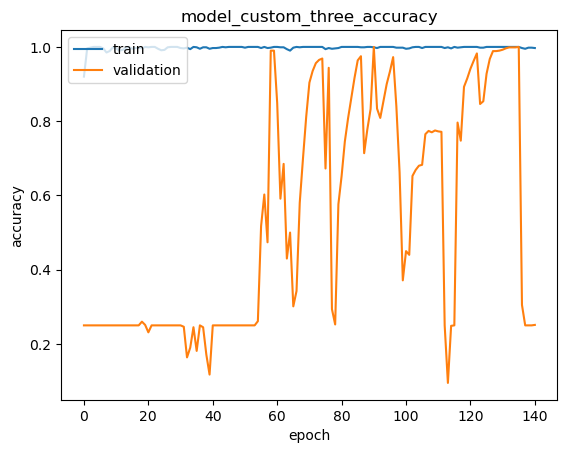

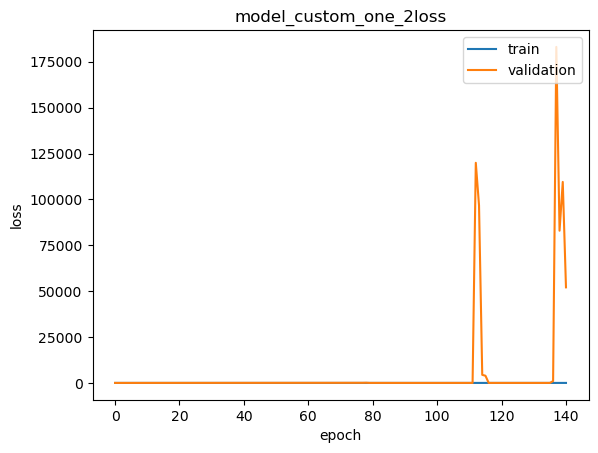

INFO:tensorflow:Assets written to: Trained_Mobile_Custom_three_Model\assets


INFO:tensorflow:Assets written to: Trained_Mobile_Custom_three_Model\assets


In [40]:
def plot_all(history):
    """
    The plot_all() function takes the history of the trained model
    and create two plots for accuracy and loss of both training and validation.
    The plots are saved as png files

    Args:
        history: The history to use and plot

    """
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model_custom_three_accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.savefig("plot_accuracy_mobile_custom_three.png")
    plt.show()
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model_custom_one_2loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper right')
    plt.savefig("plot_loss_mobile_custom_three.png")
    plt.show()
    

plot_all(history)
# Save model weights
model.save("Trained_Mobile_Custom_three_Model")

In [41]:
test_labels = test_batches.classes
predictions = model.predict(x=test_batches, verbose=0)

In [42]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true=test_labels, y_pred=predictions.argmax(axis=1))

In [43]:
test_batches.class_indices

{'0': 0, '1': 1, '2': 2, '3': 3}

Confusion matrix, without normalization
[[150   0   0   0]
 [  0 150   0   0]
 [  0   0 150   0]
 [  0   0   1 149]]


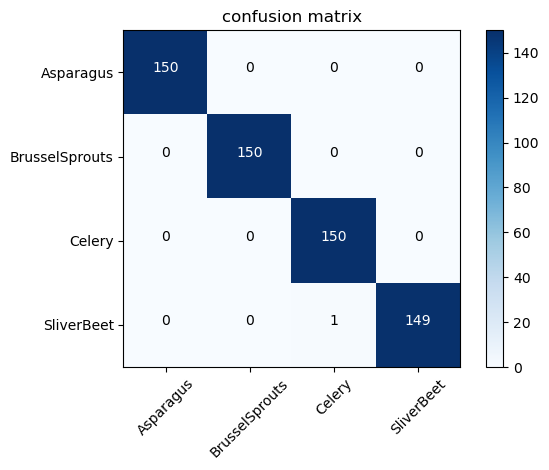

In [44]:
from matplotlib import pyplot as plt
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.savefig("confusion_mobile_custom_three.png")
    

cm_plot_labels = ['Asparagus', 'BrusselSprouts', 'Celery', 'SliverBeet']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='confusion matrix')

In [7]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0
